# 权重衰退

根据正则化来进行权重衰退

$$
\dfrac{\partial}{\partial w}\Bigl(\mathcal{l}(w,b) + \dfrac{\lambda}{2}\left\|\ w \right\| ^2 \Bigr) = \dfrac{\partial \mathcal{l}(w,b)}{\partial w}+\lambda w
$$

$$
\begin{aligned}
w'&=w-\eta \Bigl(\dfrac{\partial \mathcal{l}(w,b)}{\partial w}+\lambda w \Bigr)
\\
w'&=(1-\eta \lambda)w-\eta \dfrac{\partial \mathcal{l}(w,b)}{\partial w}
\end{aligned}
$$

其中通常 $\eta \lambda<1$ 所以常常被称作权重衰退

In [1]:
import torch
from torch import nn
import d2l.torch as d2l

随机生成一些数据, 生成公式如下, 再添加一些噪音

$$
y = + \sum _{i=1}^{d}0.01x_i + 0.05 + noise \in \mathcal{N}(0,0.01^2)
$$

In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1))*0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_train)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

在 $\operatorname{SGD}$ 中, 在往常, 我们使用的是 : `torch.optim.SGD(net.parameters()), lr=learning_rate` 在这里, 我们希望对不同的参数有不用的调整, 就传入一个 `[{..},{..}]` 的迭代器, 我们还可以特别指定每一层的学习率等...由于不惩罚 $bias$ 所以将他单独挑出来, 注意, 需要把所有的参数都写上去

In [3]:
def train_concise(wd, num_epochs, learning_rate):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    trainer = torch.optim.SGD([{"params":net[0].weight, 'weight_decay':wd}, {"params":net[0].bias}], lr=learning_rate)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log', xlim=[5,num_epochs], legend=['train','test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,(d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss)))
    print('w 的 L2 范数: ', net[0].weight.norm().item())

学习率过大, 学习曲线非常的抖

w 的 L2 范数:  0.014440891332924366


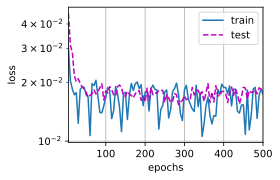

In [5]:
train_concise(100, 500, 0.01)

小的学习率容易进入局部最优解

w 的 L2 范数:  0.007944045588374138


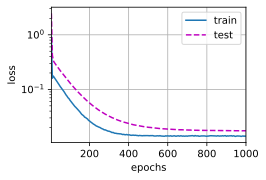

In [8]:
train_concise(100, 1000, 0.001)

下降又上升就是过拟合

w 的 L2 范数:  0.00715760188177228


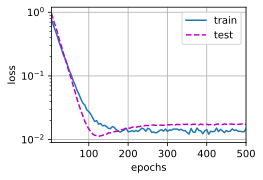

In [10]:
train_concise(100, 500, 0.003)

不设置正则化项, 直接过拟合

w 的 L2 范数:  14.261216163635254


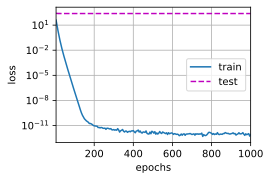

In [11]:
train_concise(0, 1000, 0.002)